# **Customer Churn Prediction**

## By: Arsh Vohra

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg'>

## Description:
**This data science project focuses on predicting customer churn in a telecom company using machine learning algorithms. The goal is to identify customers who are likely to churn (cancel their subscription) so that the company can take proactive measures to retain them and improve customer satisfaction. The project involves preprocessing the dataset, feature engineering, and utilizing three popular classifiers - Logistic Regression, Decision Trees, and Random Forest. The models are evaluated based on accuracy, ROC AUC score, and confusion matrices. Hyperparameter tuning is performed to optimize the Decision Tree and Random Forest models. The project provides valuable insights into customer retention strategies and demonstrates the effectiveness of different machine learning techniques for churn prediction.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi']=300

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()/df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [5]:
df['TotalCharges'].replace({" ":0},inplace= True)
df['TotalCharges']= df['TotalCharges'].astype(float)

In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
target = df['Churn'].astype('category')
inputs = [x for x in df.columns if x not in target.name]

In [8]:
numeric = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [9]:
catgorical = [x for x in inputs if x not in numeric]

In [10]:
cat_df  = pd.get_dummies(df[catgorical])

In [11]:
data = pd.concat([df[numeric],cat_df],axis=1)
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(data,target,train_size=0.65,random_state=42)

In [14]:
def check_accuracy(xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    train_proba = model.predict_proba(xtrain)[:,1]
    test_proba = model.predict_proba(xtest)[:,1]
    train_accuracy = accuracy_score(ytrain,train_pred)
    train_roc_auc = roc_auc_score(ytrain,train_proba)
    test_accuracy=accuracy_score(ytest,test_pred)
    test_roc_auc = roc_auc_score(ytest,test_proba)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Test is {}".format(test_accuracy))
    print("Roc Auc Score on Test is {}".format(test_roc_auc))
    print("Classification Report \n",classification_report(ytrain,train_pred))
    label = ['Yes','No']
    cm = confusion_matrix(ytrain,train_pred,labels=(['Yes','No']),normalize='true')
    sns.heatmap(cm,annot=True,cmap='plasma',fmt = '0.1f',xticklabels=label,yticklabels=label)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix For Training data")
    plt.show()

# Logistic Regression

In [15]:
def test_Parameters_log(**params):
    model = LogisticRegression(random_state=42,**params)
    model.fit(xtrain,ytrain)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    train_proba = model.predict_proba(xtrain)[:,1]
    test_proba = model.predict_proba(xtest)[:,1]
    train_accuracy = accuracy_score(ytrain,train_pred)
    train_roc_auc = roc_auc_score(ytrain,train_proba)
    test_accuracy=accuracy_score(ytest,test_pred)
    test_roc_auc = roc_auc_score(ytest,test_proba)
    print("Accuracy Score on Train is {}".format(train_accuracy))
    print("Roc Auc Score on Train is {}".format(train_roc_auc))
    print("Accuracy Score on Test is {}".format(test_accuracy))
    print("Roc Auc Score on Test is {}".format(test_roc_auc))

Accuracy Score on Train is 0.8033646493336246
Roc Auc Score on Train is 0.8379990869608134
Accuracy Score on Test is 0.8130575831305759
Roc Auc Score on Test is 0.8608975430733667
Classification Report 
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      3377
         Yes       0.66      0.52      0.58      1200

    accuracy                           0.80      4577
   macro avg       0.75      0.71      0.73      4577
weighted avg       0.79      0.80      0.80      4577



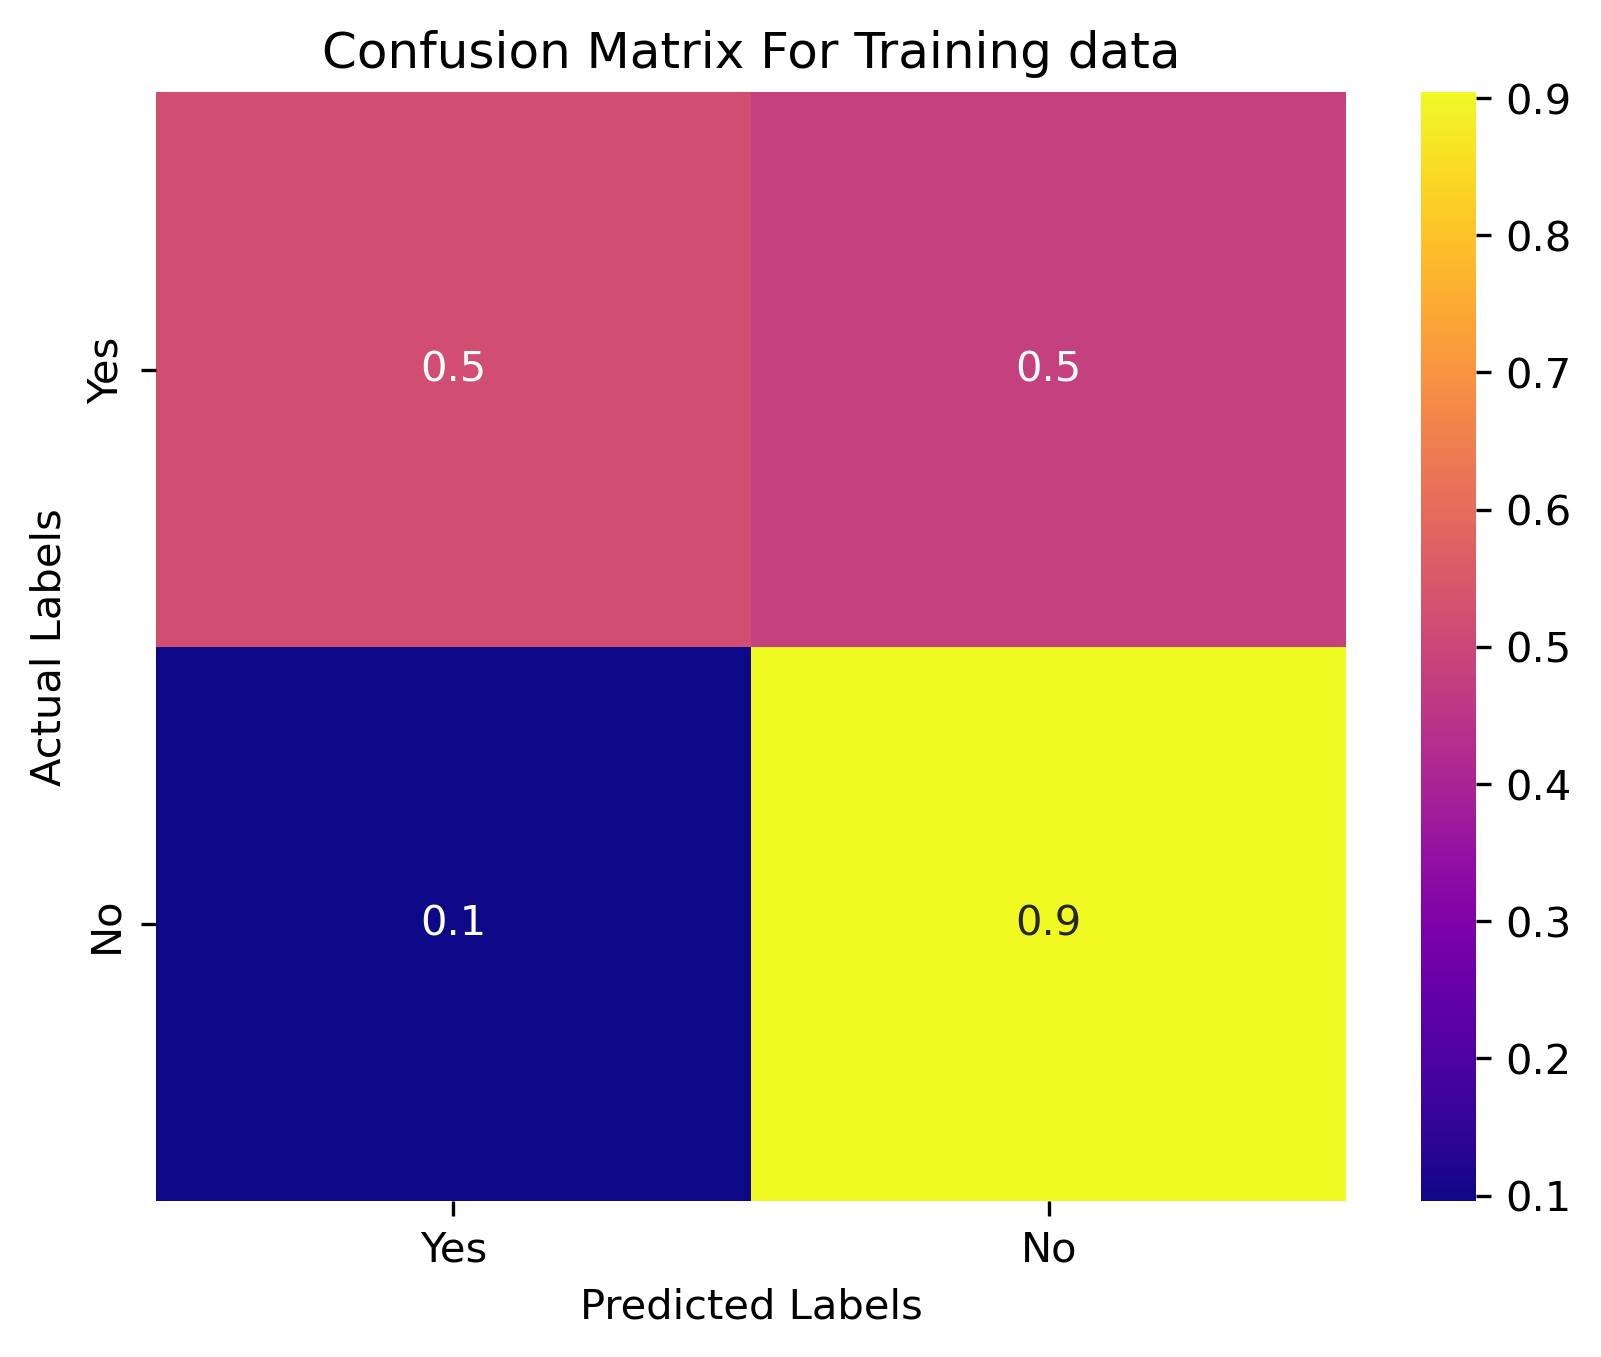

In [16]:
model = LogisticRegression(random_state=42)
check_accuracy(xtrain,xtest,ytrain,ytest)

In [17]:
test_Parameters_log(max_iter=1000)

Accuracy Score on Train is 0.803146165610662
Roc Auc Score on Train is 0.8403510265521668
Accuracy Score on Test is 0.8150851581508516
Roc Auc Score on Test is 0.8609482836782447


In [18]:
test_Parameters_log(solver='saga')

Accuracy Score on Train is 0.7633821280314617
Roc Auc Score on Train is 0.738548144309545
Accuracy Score on Test is 0.7725060827250608
Roc Auc Score on Test is 0.767377617404194


In [32]:
log_model = LogisticRegression(random_state=42)
log_model.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

# Decision Trees

Accuracy Score on Train is 0.9984706139392615
Roc Auc Score on Train is 0.9999934606652848
Accuracy Score on Test is 0.7376317923763179
Roc Auc Score on Test is 0.6662332919922176
Classification Report 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3377
         Yes       1.00      1.00      1.00      1200

    accuracy                           1.00      4577
   macro avg       1.00      1.00      1.00      4577
weighted avg       1.00      1.00      1.00      4577



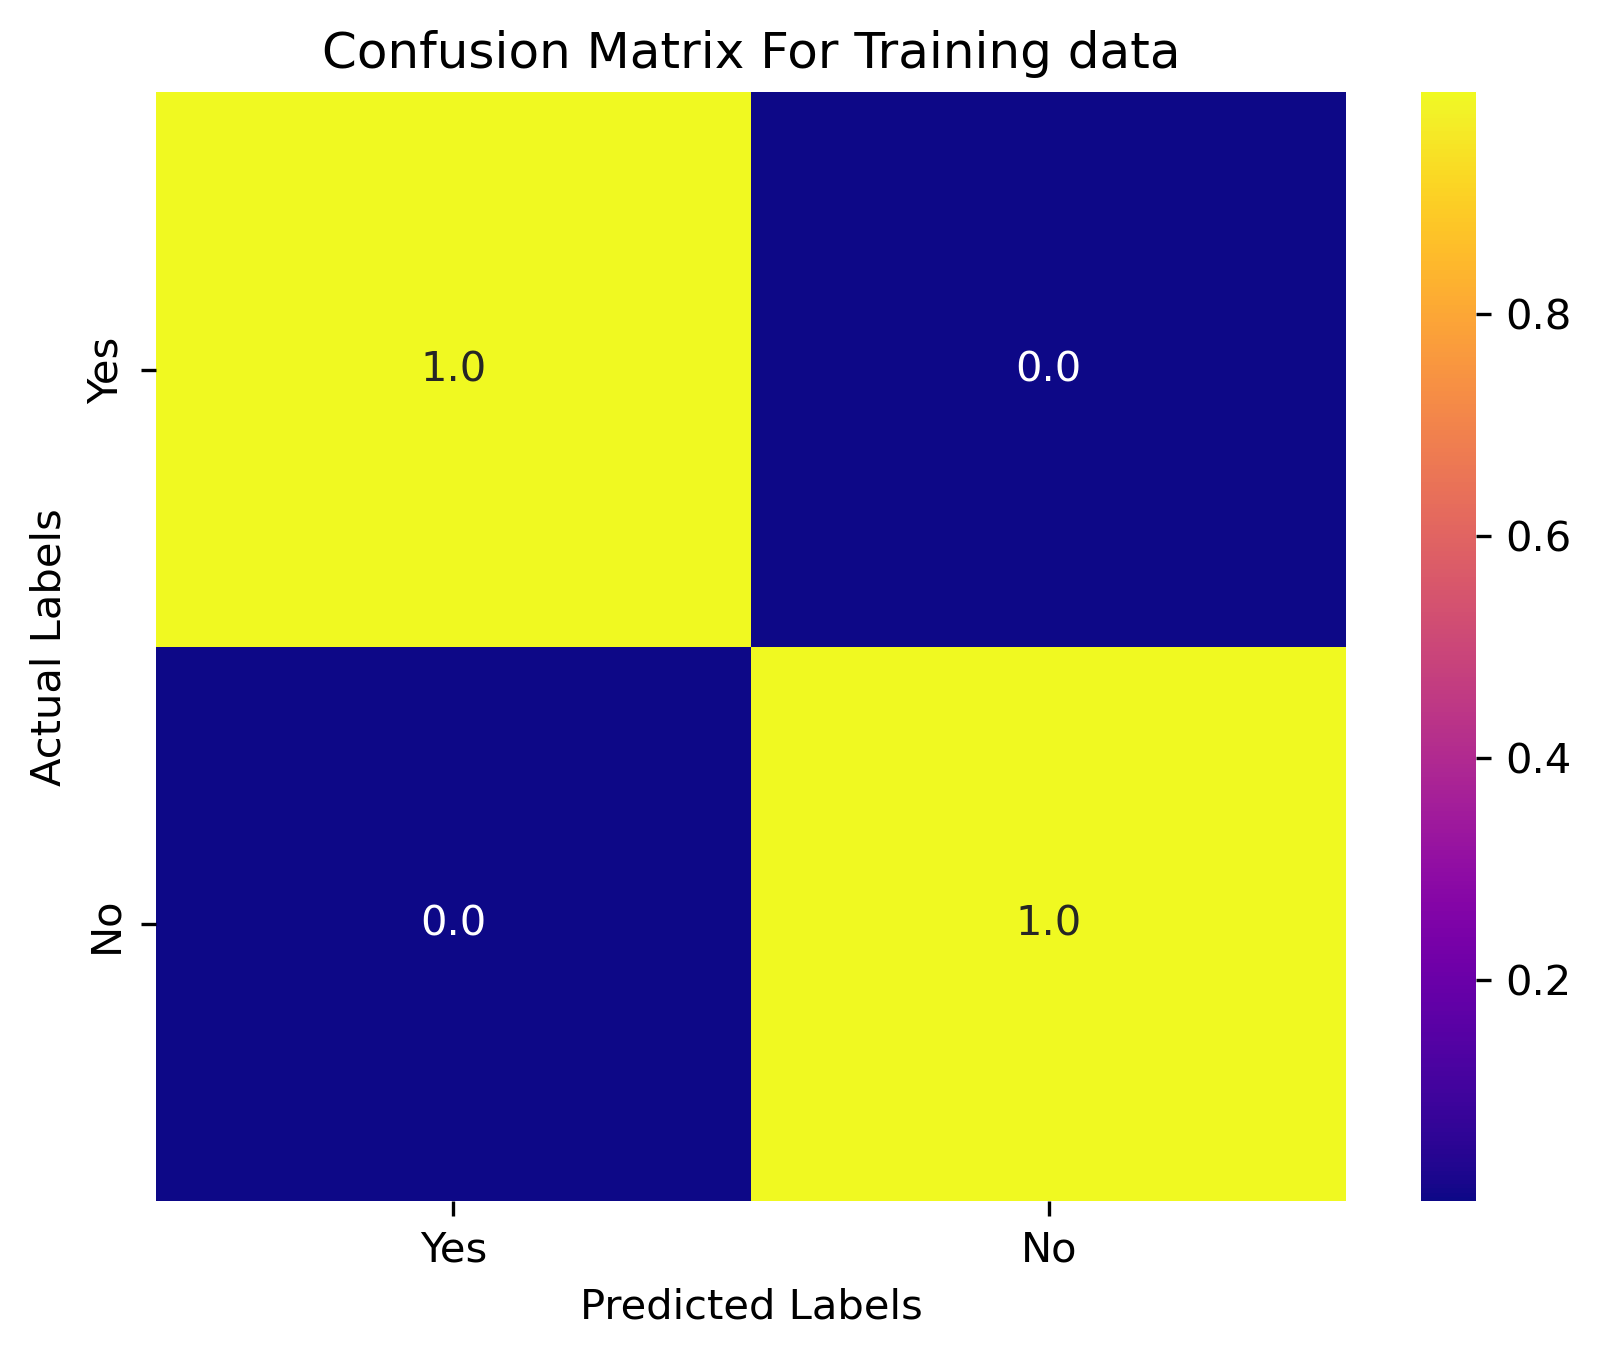

CPU times: total: 297 ms
Wall time: 746 ms


In [20]:
%%time
model = DecisionTreeClassifier(random_state=42)
check_accuracy(xtrain,xtest,ytrain,ytest)

In [21]:
ma = [3,5,10,25]
ml = [15,30,70]
md = [15,30, 70]
model_preformance_data =[]

for i in ma:
    for j in ml:
        for k in md:
            
            mp = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_leaf=j,min_samples_split=k)
            dt_model = mp.fit(xtrain,ytrain)
            test_pred = dt_model.predict_proba(xtest)
            train_pred = dt_model.predict_proba(xtrain)
            t1 = "max_depth"+str(i)+"_min_samples_leaf"+str(j)+"_min_split"+str(k)
            t2 = [t1,round(roc_auc_score(ytrain, train_pred[:,1]),4),round(roc_auc_score(ytest, test_pred[:,1]),4)]
            model_preformance_data.append(t2)
            
df2 = pd.DataFrame(model_preformance_data)
df2.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)
df2.sort_values(['Test AUC','Train AUC'],ascending= False).head(10)

,Model,Train AUC,Test AUC
24,max_depth10_min_samples_leaf70_min_split15,0.8575,0.8451
25,max_depth10_min_samples_leaf70_min_split30,0.8575,0.8451
26,max_depth10_min_samples_leaf70_min_split70,0.8575,0.8451
35,max_depth25_min_samples_leaf70_min_split70,0.8575,0.8449
34,max_depth25_min_samples_leaf70_min_split30,0.8575,0.8448
33,max_depth25_min_samples_leaf70_min_split15,0.8575,0.8445
13,max_depth5_min_samples_leaf30_min_split30,0.8502,0.8440
12,max_depth5_min_samples_leaf30_min_split15,0.8502,0.8435
14,max_depth5_min_samples_leaf30_min_split70,0.8502,0.8435
15,max_depth5_min_samples_leaf70_min_split15,0.8489,0.8426


In [22]:
dt_model = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_leaf=70,min_samples_split=70)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=70, min_samples_split=70,
                       random_state=42)

Clasification Report for Training Data:
               precision    recall  f1-score   support

          No       0.83      0.93      0.88      3377
         Yes       0.71      0.45      0.55      1200

    accuracy                           0.81      4577
   macro avg       0.77      0.69      0.71      4577
weighted avg       0.79      0.81      0.79      4577



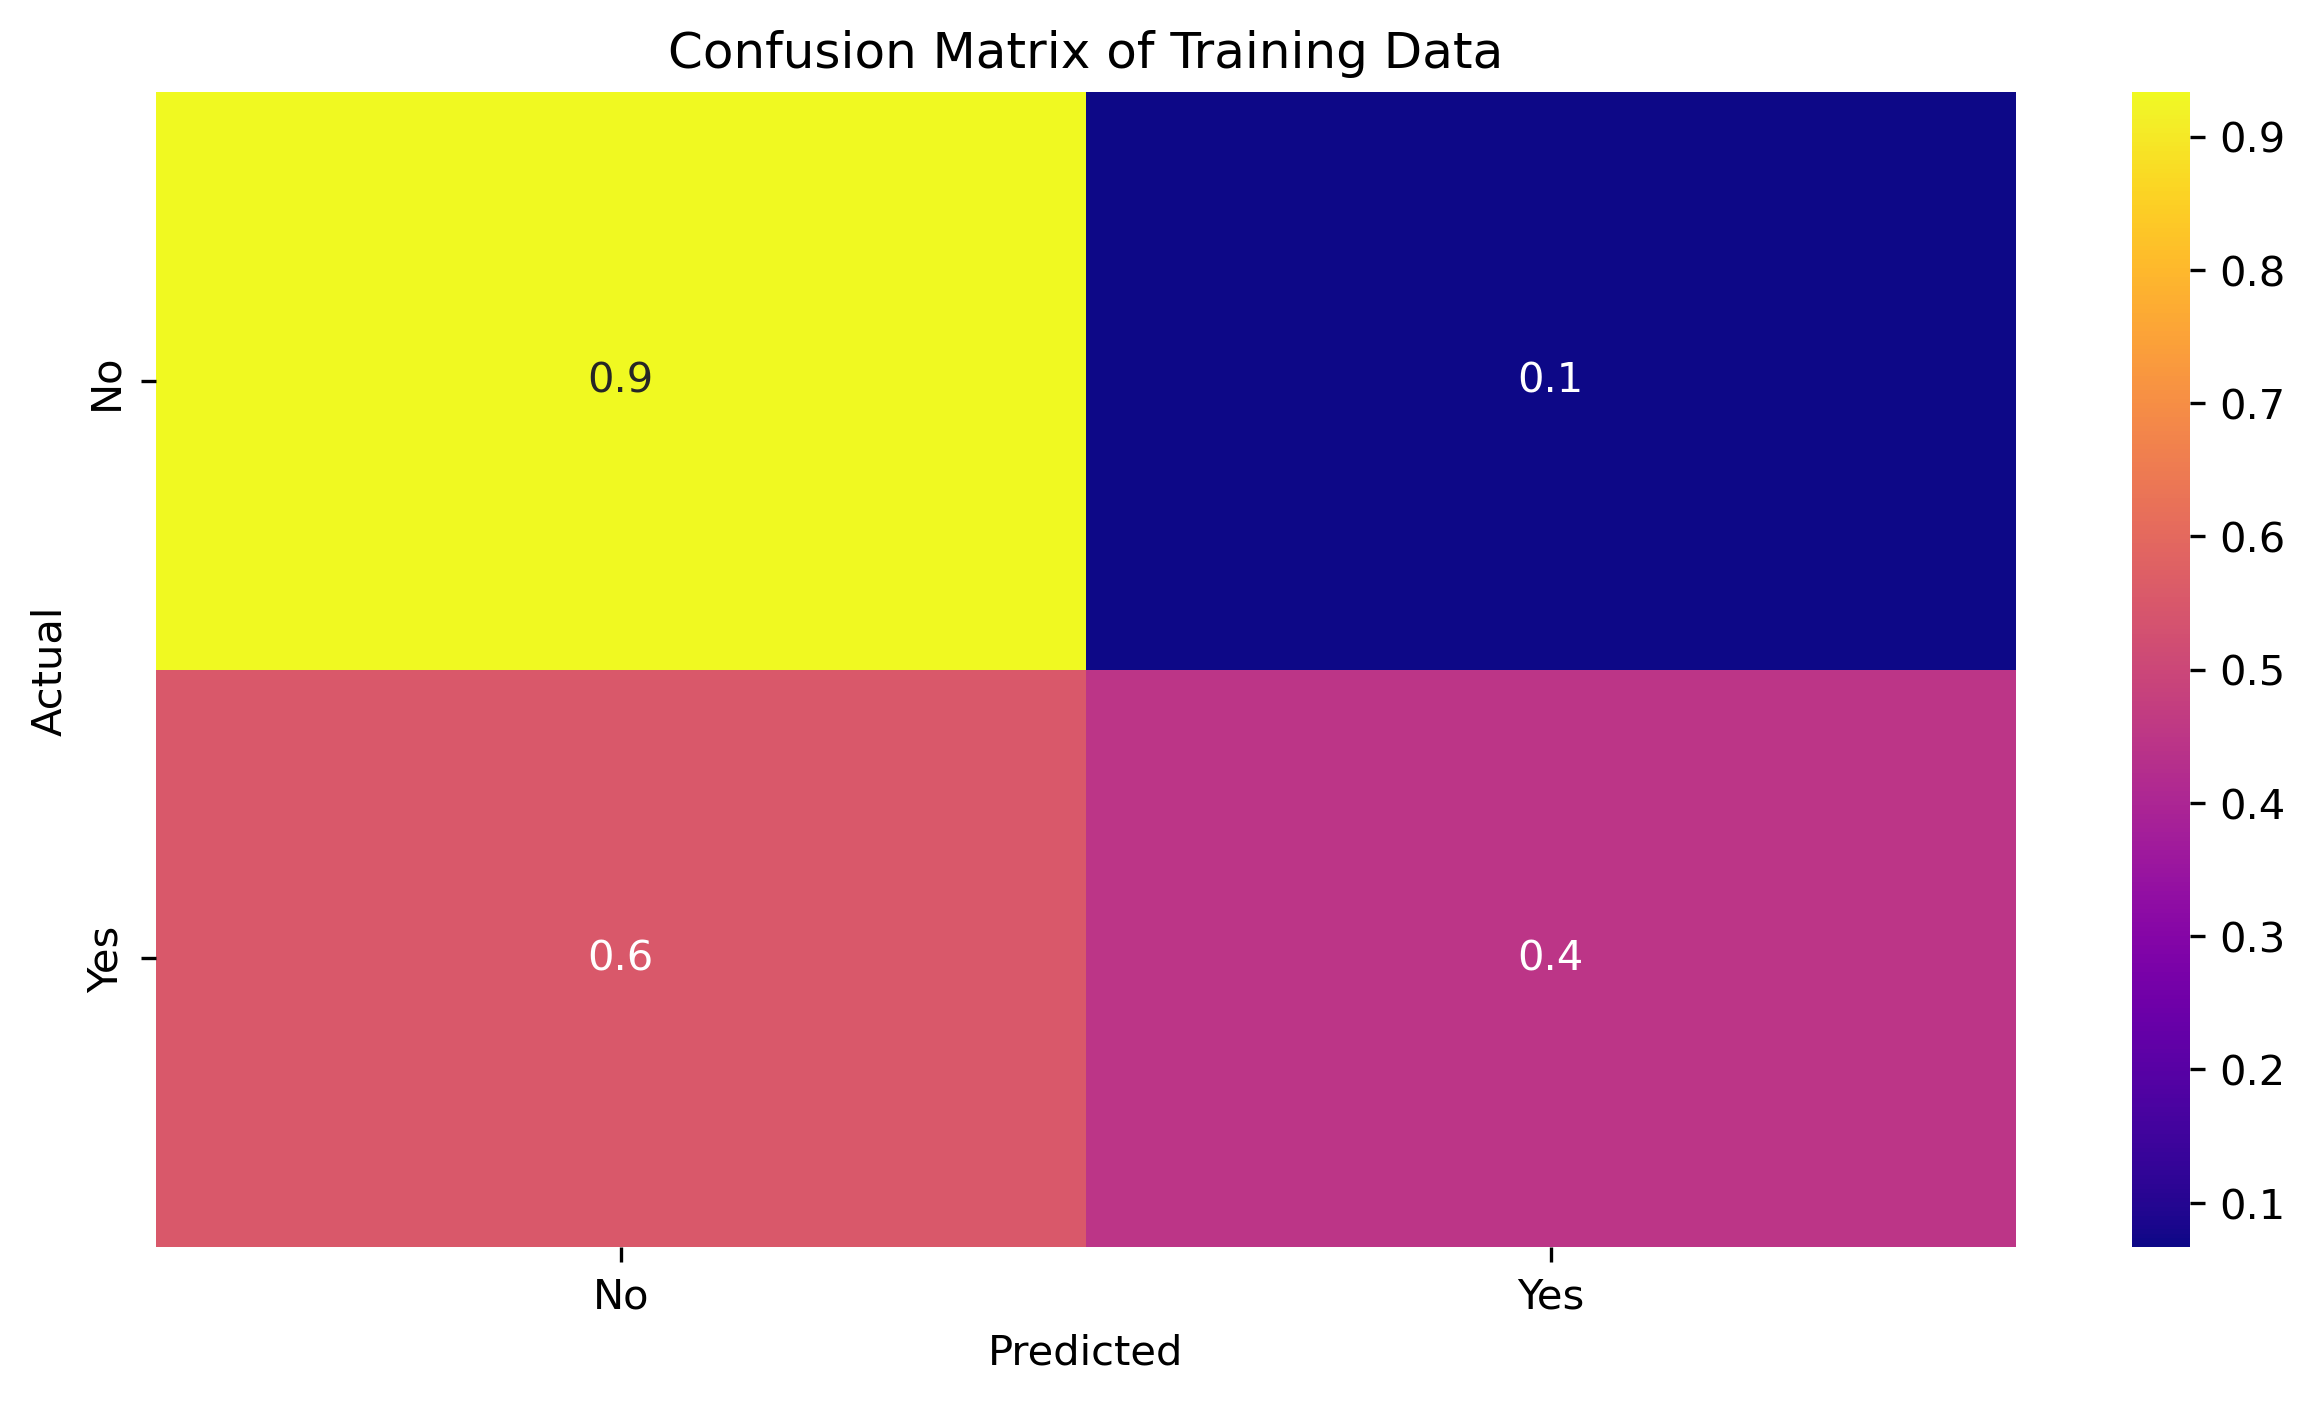

In [23]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(ytrain,dt_model.predict(xtrain),normalize='true')
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"No",1:"Yes"},axis=0,inplace=True)
cm_df.rename({0:"No",1:"Yes"},axis=1,inplace=True)
sns.heatmap(cm_df,annot=True,fmt='0.1f',cmap='plasma')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Training Data")
print("Clasification Report for Training Data:\n",classification_report(ytrain,dt_model.predict(xtrain)))

# Random Forest

Accuracy Score on Train is 0.9984706139392615
Roc Auc Score on Train is 0.9999090662323561
Accuracy Score on Test is 0.7935928629359287
Roc Auc Score on Test is 0.8364181125659526
Classification Report 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3377
         Yes       1.00      1.00      1.00      1200

    accuracy                           1.00      4577
   macro avg       1.00      1.00      1.00      4577
weighted avg       1.00      1.00      1.00      4577



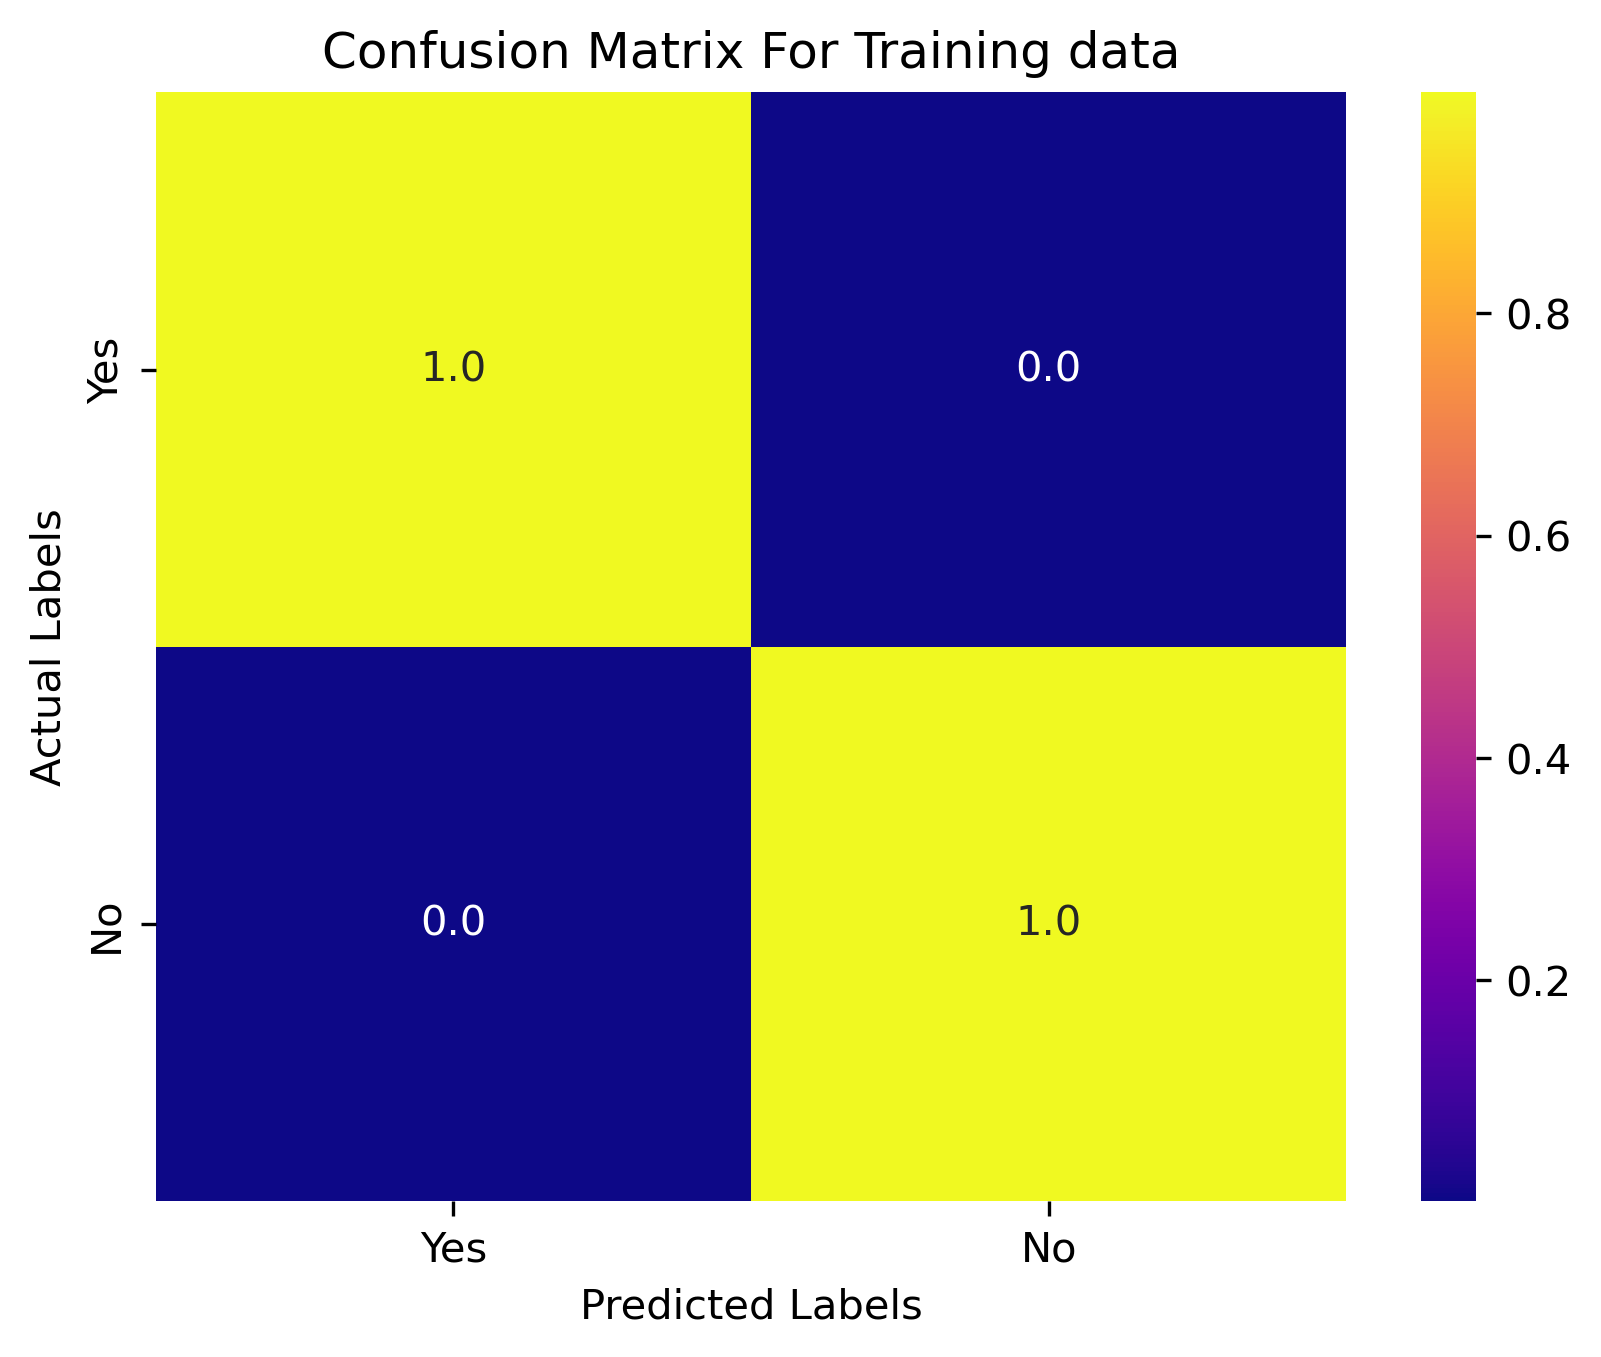

In [24]:
model = RandomForestClassifier(random_state=42)
check_accuracy(xtrain,xtest,ytrain,ytest)

In [25]:
%%time
n_estimators = [100, 200, 300]
max_depth = [5, 10, 20,]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2']
ccp_alpha = [0.1,0.2,0.3,0.01]

results = []


for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                for f in max_features:
                    for i in ccp_alpha:
                        
                        rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, max_features=f,ccp_alpha=i,random_state=42,n_jobs=-1)
                        rf.fit(xtrain, ytrain)
                        test_pred = rf.predict_proba(xtest)
                        train_pred = rf.predict_proba(xtrain)
                        t1 = "n_estimators_"+str(n)+"_max_depth_"+str(d)+"_min_samples_split_"+str(s)+"_min_samples_leaf_"+str(l)+"_max_features_"+str(f)+"_ccp_alpha"+str(i)
                        t2 = [t1,round(roc_auc_score(ytrain, train_pred[:,1]),4),round(roc_auc_score(ytest, test_pred[:,1]),4)]
                        results.append(t2)
df3 = pd.DataFrame(results)
df3.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)
df3.sort_values(['Test AUC','Train AUC'],ascending= False).head(10)

CPU times: total: 6min 54s
Wall time: 11min 45s


,Model,Train AUC,Test AUC
167,n_estimators_100_max_depth_20_min_samples_spli...,0.8322,0.8516
191,n_estimators_100_max_depth_20_min_samples_spli...,0.8322,0.8516
159,n_estimators_100_max_depth_20_min_samples_spli...,0.8318,0.8512
135,n_estimators_100_max_depth_10_min_samples_spli...,0.8311,0.8512
627,n_estimators_300_max_depth_20_min_samples_spli...,0.8327,0.8510
111,n_estimators_100_max_depth_10_min_samples_spli...,0.8326,0.8510
151,n_estimators_100_max_depth_20_min_samples_spli...,0.8318,0.8510
103,n_estimators_100_max_depth_10_min_samples_spli...,0.8313,0.8510
635,n_estimators_300_max_depth_20_min_samples_spli...,0.8324,0.8508
183,n_estimators_100_max_depth_20_min_samples_spli...,0.8315,0.8508


In [26]:
%%time
rf_model = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=2,min_samples_leaf=1,max_features='log2',ccp_alpha=0.01,random_state=42)
rf_model.fit(xtrain,ytrain)

CPU times: total: 766 ms
Wall time: 989 ms


RandomForestClassifier(ccp_alpha=0.01, max_depth=20, max_features='log2',
                       random_state=42)

Clasification Report for Training Data:
               precision    recall  f1-score   support

          No       0.83      0.93      0.88      3377
         Yes       0.71      0.45      0.55      1200

    accuracy                           0.81      4577
   macro avg       0.77      0.69      0.71      4577
weighted avg       0.79      0.81      0.79      4577



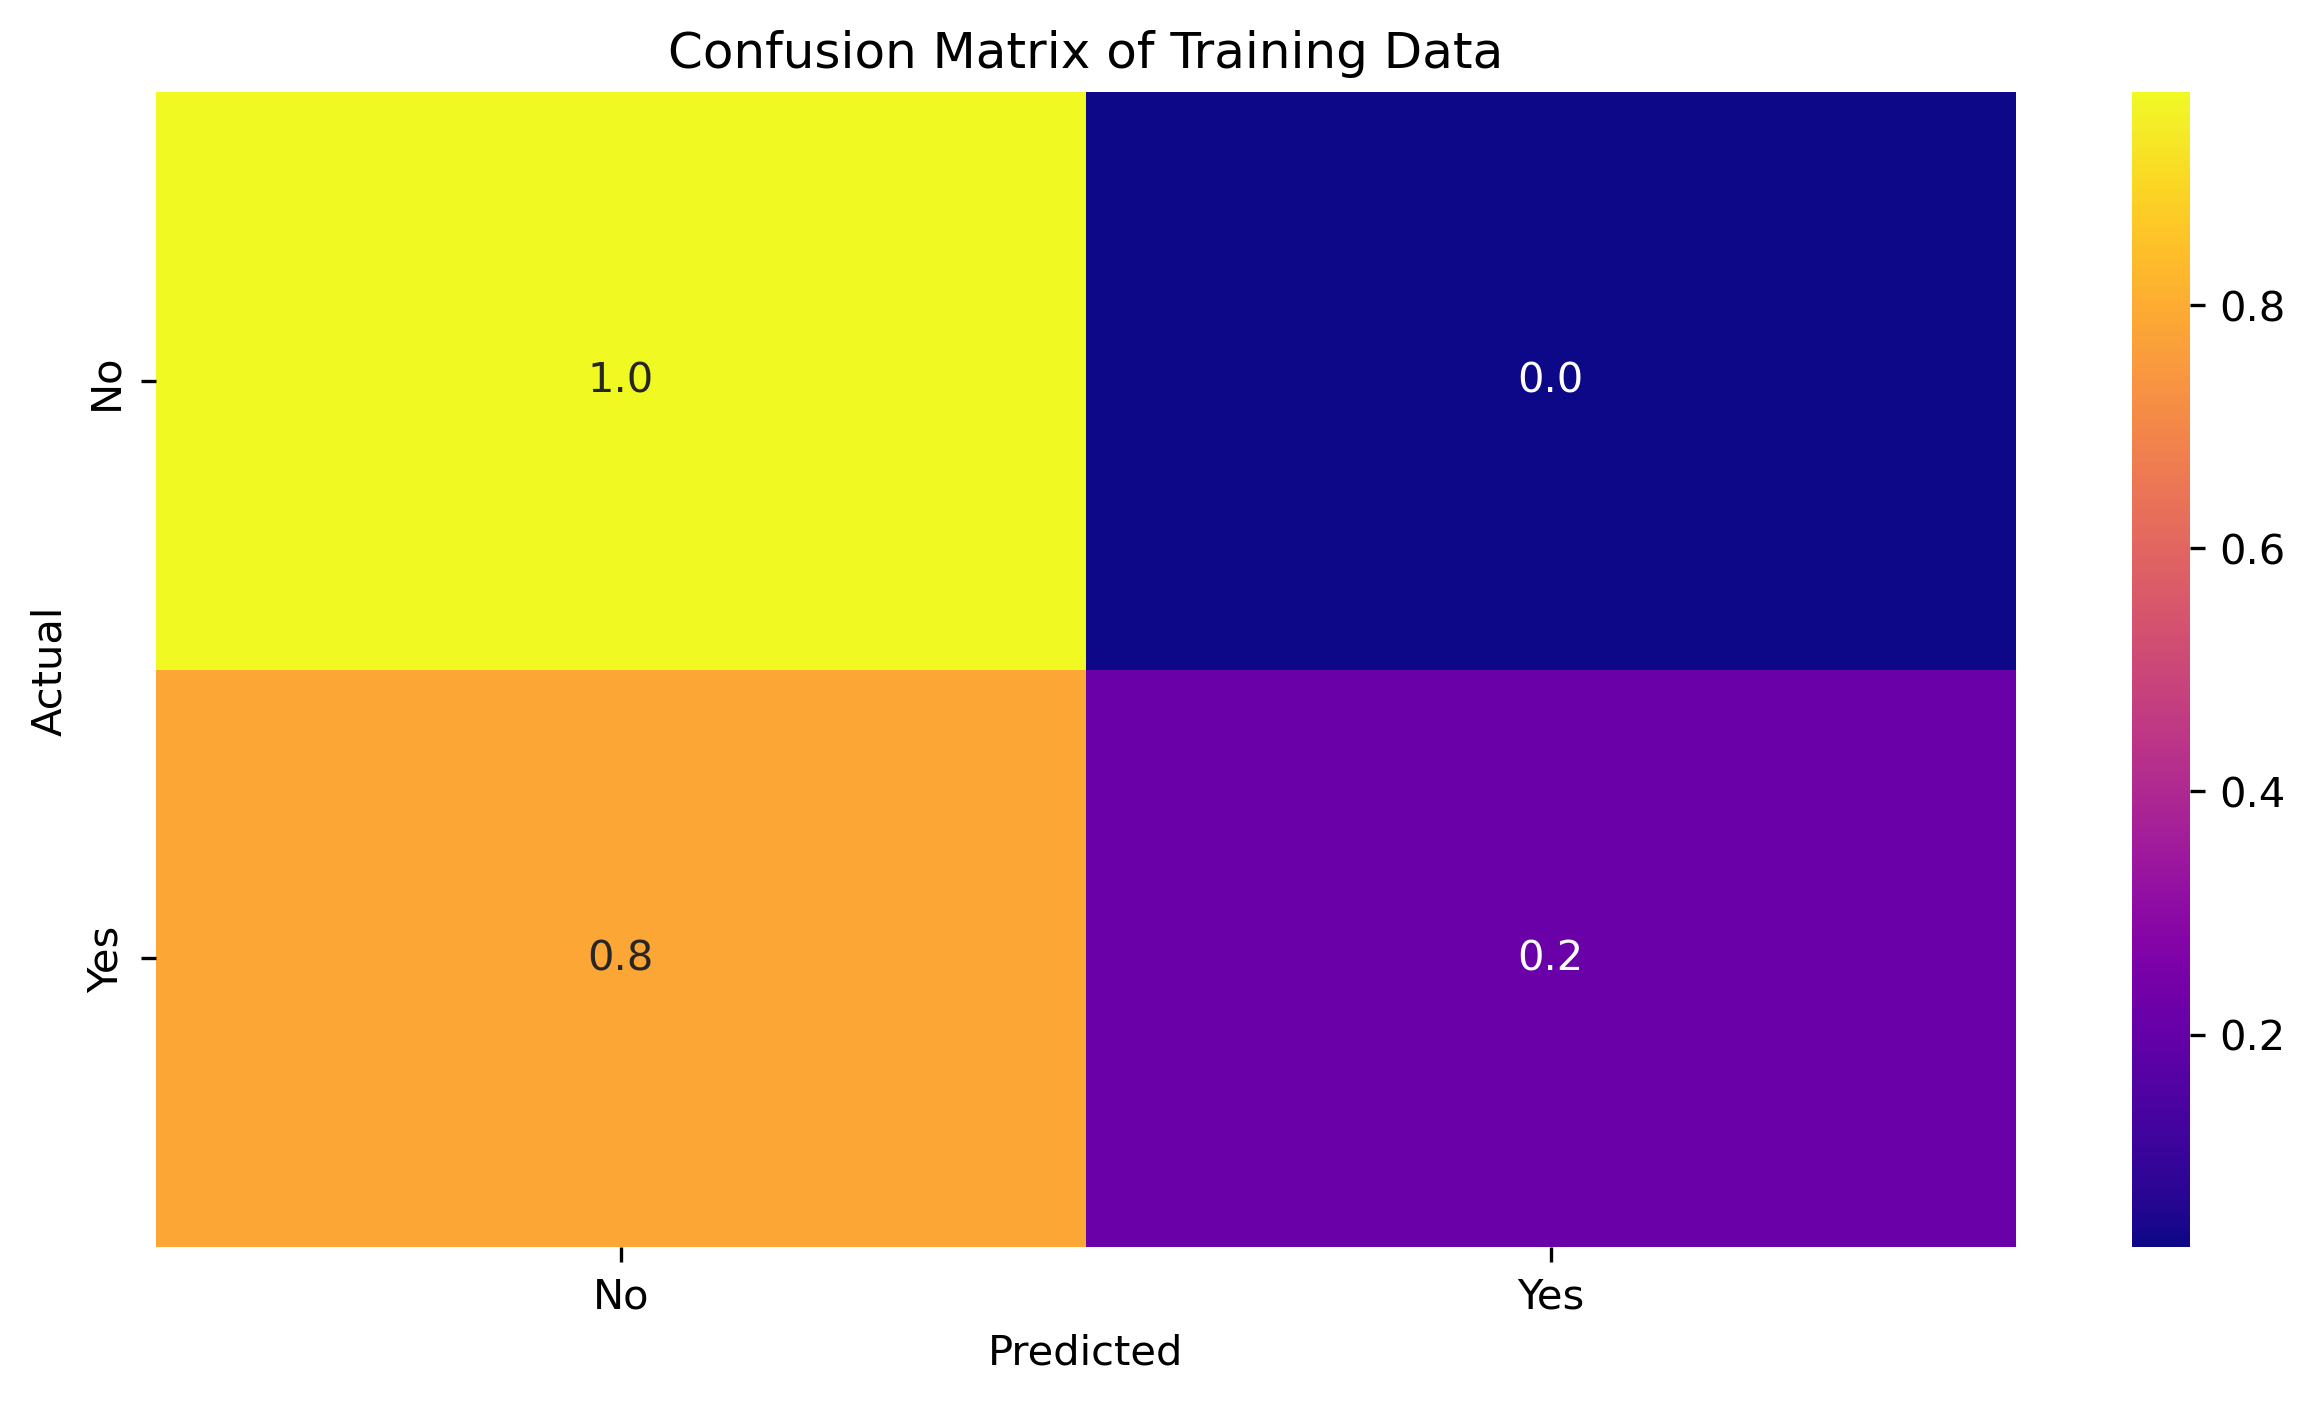

In [27]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(ytrain,rf_model.predict(xtrain),normalize='true')
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"No",1:"Yes"},axis=0,inplace=True)
cm_df.rename({0:"No",1:"Yes"},axis=1,inplace=True)
sns.heatmap(cm_df,annot=True,fmt='0.1f',cmap='plasma')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Training Data")
print("Clasification Report for Training Data:\n",classification_report(ytrain,dt_model.predict(xtrain)))

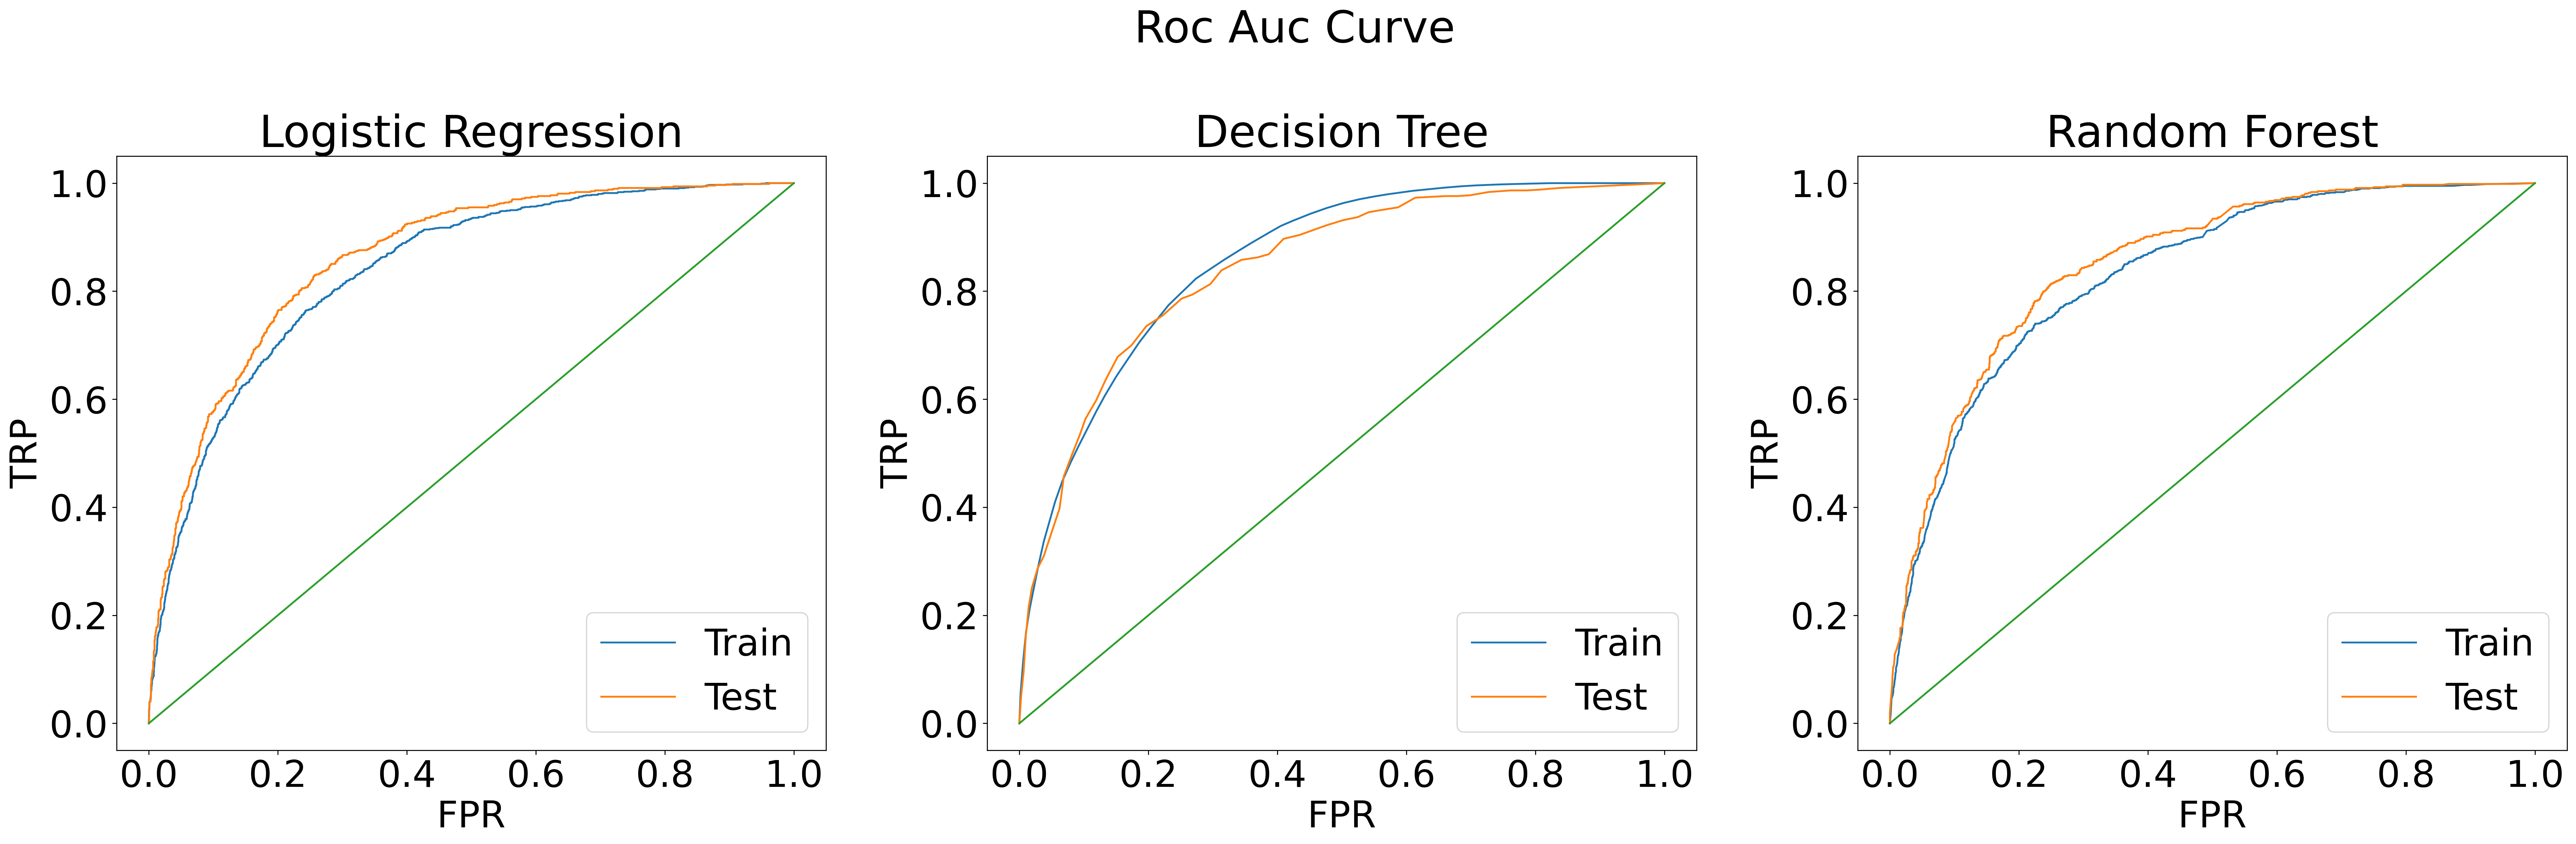

In [33]:
log_fpr_train,log_trp_train,threshold = roc_curve(ytrain,log_model.predict_proba(xtrain)[:,1],pos_label='Yes')
log_fpr_test,log_trp_test,threshold = roc_curve(ytest,log_model.predict_proba(xtest)[:,1],pos_label='Yes')

dt_fpr_train,dt_trp_train,threshold = roc_curve(ytrain,dt_model.predict_proba(xtrain)[:,1],pos_label='Yes')
dt_fpr_test,dt_trp_test,threshold = roc_curve(ytest,dt_model.predict_proba(xtest)[:,1],pos_label='Yes')

rf_fpr_train,rf_trp_train,threshold = roc_curve(ytrain,rf_model.predict_proba(xtrain)[:,1],pos_label='Yes')
rf_fpr_test,rf_trp_test,threshold = roc_curve(ytest,rf_model.predict_proba(xtest)[:,1],pos_label='Yes')


plt.rcParams['font.size']=30

fig,axes = plt.subplots(1,3,figsize=(30,10))

axes[0].plot(log_fpr_train,log_trp_train,label='Train')
axes[0].plot(log_fpr_test,log_trp_test,label='Test')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TRP")
axes[0].plot([0, 1])
axes[0].legend()
axes[0].set_title("Logistic Regression")


axes[1].plot(dt_fpr_train,dt_trp_train,label='Train')
axes[1].plot(dt_fpr_test,dt_trp_test,label='Test')
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TRP")
axes[1].plot([0, 1])
axes[1].legend()
axes[1].set_title("Decision Tree")

axes[2].plot(rf_fpr_train,rf_trp_train,label='Train')
axes[2].plot(rf_fpr_test,rf_trp_test,label='Test')
axes[2].set_xlabel("FPR")
axes[2].set_ylabel("TRP")
axes[2].plot([0, 1])
axes[2].legend()
axes[2].set_title("Random Forest")

fig.suptitle("Roc Auc Curve")
plt.tight_layout()